# Week 15
# Analyzing Stock Prices

Stock prices is a typical example of time series data. Today we will look at the daily prices of stocks and discover the trend of stock movements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

%matplotlib inline

In [2]:
# if you haven't installed yahoo finance library, execute the command below:
# Install yahoo finance library
!pip install yfinance

You should consider upgrading via the 'c:\users\lzhao\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# Download the daily prices of Tesla ("TSLA") from 2020-01-01 to 2020-11-30
tsla = yf.download('TSLA', start="2020-01-01", end="2020-11-30")

tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [4]:
tsla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32807300
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300
2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500
2020-11-25,550.059998,574.000000,545.369995,574.000000,574.000000,48930200
2020-11-27,581.159973,598.780029,578.450012,585.760010,585.760010,37561100


In [5]:
# Type of index
type(tsla.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

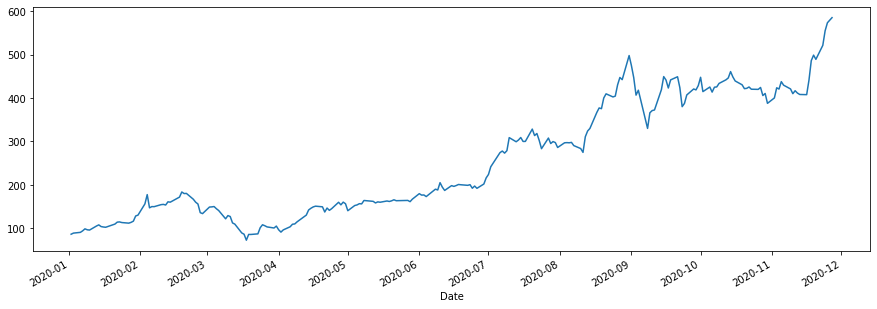

In [6]:
# Draw a line chart of close prices
tsla['Close'].plot(figsize=(15, 5))

**1. Check for missing values**

In [7]:
tsla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**2. Daily Change**

- Absolute daily change is the difference between open and close.
- Relative daily change is ratio of absolute daily change and the open price, converted to a percentage. This is especially helpful if you want to compare the daily price change in multiple stocks.

In [8]:
# Calculate the absolute price change of each day.

tsla['AbsoluteDailyChange'] = tsla['Close'] - tsla['Open']

tsla

,Open,High,Low,Close,Adj Close,Volume,AbsoluteDailyChange
Date,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,1.152000
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,0.501999
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,2.213997
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,1.531998
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,3.688004
...,...,...,...,...,...,...,...
2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32807300,-8.380005
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300,18.349976
2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500,14.979980


In [9]:
# Calculate the relative price change of each day.

tsla['RelativeDailyChange'] = tsla['AbsoluteDailyChange'] / tsla['Open'] * 100

tsla

,Open,High,Low,Close,Adj Close,Volume,AbsoluteDailyChange,RelativeDailyChange
Date,,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,1.152000,1.356891
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,0.501999,0.569806
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,2.213997,2.513221
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,1.531998,1.660162
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,3.688004,3.892763
...,...,...,...,...,...,...,...,...
2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32807300,-8.380005,-1.682766
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300,18.349976,3.644484
2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500,14.979980,2.772017


**3. Day-To-Day Change**

The open price does not necessarily coincide with the previous close price, possibly due to change of price expections over night. Thus it is helpful to calculate percent changes of each close price over the previous close price.

In [10]:
# get the closing price of the previous day
tsla['CloseYesterday'] = tsla.shift(1)['Close']
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,AbsoluteDailyChange,RelativeDailyChange,CloseYesterday
Date,,,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,1.152000,1.356891,NaN
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,0.501999,0.569806,86.052002
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,2.213997,2.513221,88.601997
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,1.531998,1.660162,90.307999
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,3.688004,3.892763,93.811996


In [12]:
# Calculate day-to-day change on close prices.
tsla['DayToDayChange'] = tsla['Close'] - tsla['CloseYesterday']
tsla['DayToDayChangePercent'] = tsla['DayToDayChange'] / tsla['Close'] * 100

tsla.head().T

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08
Open,8.490000e+01,8.810000e+01,8.809400e+01,9.228000e+01,9.474000e+01
High,8.614000e+01,9.080000e+01,9.031200e+01,9.432600e+01,9.969800e+01
Low,8.434200e+01,8.738400e+01,8.800000e+01,9.067200e+01,9.364600e+01
Close,8.605200e+01,8.860200e+01,9.030800e+01,9.381200e+01,9.842800e+01
Adj Close,8.605200e+01,8.860200e+01,9.030800e+01,9.381200e+01,9.842800e+01
Volume,4.766050e+07,8.889250e+07,5.066500e+07,8.941050e+07,1.557215e+08
AbsoluteDailyChange,1.152000e+00,5.019989e-01,2.213997e+00,1.531998e+00,3.688004e+00
RelativeDailyChange,1.356891e+00,5.698058e-01,2.513221e+00,1.660162e+00,3.892763e+00
CloseYesterday,NaN,8.605200e+01,8.860200e+01,9.030800e+01,9.381200e+01
DayToDayChange,NaN,2.549995e+00,1.706001e+00,3.503998e+00,4.616005e+00


In [13]:
# Remove columns created by intermediate steps.
tsla.drop(["CloseYesterday", "DayToDayChange"], axis=1, inplace=True)
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,AbsoluteDailyChange,RelativeDailyChange,DayToDayChangePercent
Date,,,,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,1.152000,1.356891,NaN
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,0.501999,0.569806,2.878034
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,2.213997,2.513221,1.889092
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,1.531998,1.660162,3.735128
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,3.688004,3.892763,4.689727


In [14]:
# On which day has Tesla price experience the most increase?
tsla['DayToDayChangePercent'].argmax()

21

In [15]:
# Use idxmax() to retrieve the index.
tsla['DayToDayChangePercent'].idxmax()

Timestamp('2020-02-03 00:00:00')

In [24]:
# How much had the price increased on that day?
timestamp = tsla['DayToDayChangePercent'].idxmax()
print(timestamp)
# tsla[timestamp] # This expression does not work

# tsla.loc['2020-02-03'] # This works
tsla.asof(timestamp).to_frame() # This works

2020-02-03 00:00:00


,2020-02-03
Open,1.347380e+02
High,1.572280e+02
Low,1.347040e+02
Close,1.560000e+02
Adj Close,1.560000e+02
Volume,2.361675e+08
AbsoluteDailyChange,2.126199e+01
RelativeDailyChange,1.578025e+01
DayToDayChangePercent,1.659359e+01


In [25]:
# On which day has Tesla price experience the most decrease? 

tsla['DayToDayChangePercent'].idxmin()

Timestamp('2020-09-08 00:00:00')

In [26]:
# How much had the price decrease on that day?

tsla.asof(tsla['DayToDayChangePercent'].idxmin()).to_frame()

,2020-09-08
Open,3.560000e+02
High,3.687400e+02
Low,3.298800e+02
Close,3.302100e+02
Adj Close,3.302100e+02
Volume,1.154657e+08
AbsoluteDailyChange,-2.579001e+01
RelativeDailyChange,-7.244384e+00
DayToDayChangePercent,-2.668303e+01


**4. Monthly Performance**

For long-term investors, they may prefer monthly performance data. Create a new data frame containing Open, High, Low, Close, and Volume for each month in 2020.

In [29]:
# Create a new data frame containing the open price of each month
tsla['Month'] = tsla.index.month
# tsla.head()

groups = tsla.groupby('Month')

monthly_data = groups['Open'].first()
monthly_data = monthly_data.to_frame("Open")

monthly_data

,Open
Month,
1,84.900002
2,134.738007
3,142.251999
4,100.800003
5,151.000000
6,171.600006
7,216.600006
8,289.839996
9,502.140015


In [33]:
# Add columns representing monthly high, monthly low, monthly close, and monthly volume.

monthly_data['High'] = groups['High'].max()
monthly_data['Low'] = groups['Low'].min()
monthly_data['Close'] = groups['Close'].last()
monthly_data['Volume'] = groups['Volume'].sum()

monthly_data

,Open,High,Low,Close,Volume
Month,,,,,
1,84.900002,130.600006,84.342003,130.113998,2036092500
2,134.738007,193.798004,122.304001,133.598007,2365483000
3,142.251999,161.395996,70.101997,104.800003,2104675000
4,100.800003,173.964005,89.279999,156.376007,514408800
5,151.000000,168.658005,136.608002,167.000000,272779500
6,171.600006,217.537994,170.820007,215.962006,1278863500
7,216.600006,358.997986,216.100006,286.152008,1893612000
8,289.839996,500.140015,273.000000,498.320007,1557876400
9,502.140015,502.489990,329.880005,429.010010,1736563100


**5. Moving Average**

The daily price is full of random ups and downs, making it difficult to see the long-term trend. It is important to find the average performance over a fairly longer period (10 days, 30 days, etc.). A moving average (or rolling average) is a calculation that find the average price for each period of time.

In [39]:
# Create 30-day moving average
moving_avg = tsla.rolling(10).mean()

moving_avg

,Open,High,Low,Close,Adj Close,Volume,AbsoluteDailyChange,RelativeDailyChange,DayToDayChangePercent,Month
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-11-20,440.938000,450.838000,429.601999,439.422998,439.422998,38345460.0,-1.515002,-0.357135,1.210161,11.0
2020-11-23,447.338000,458.188000,437.681000,449.481995,449.481995,39888190.0,2.143994,0.422331,2.034249,11.0
2020-11-24,459.369003,472.178000,450.698001,463.983997,463.983997,42224620.0,4.614993,0.931149,2.903601,11.0


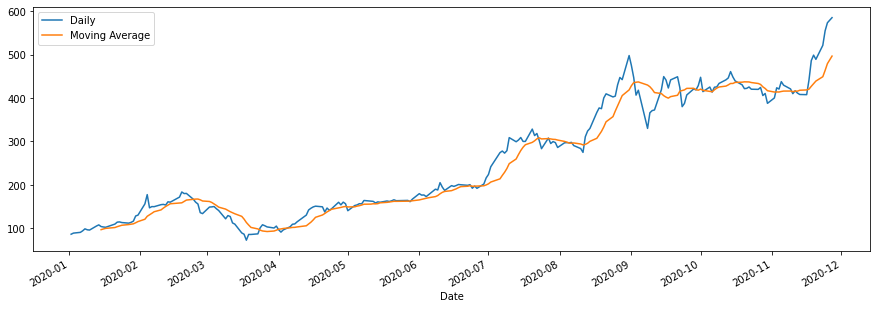

In [40]:
# Plot daily prices and the moving average.
plt.figure(figsize=(15, 5))
tsla['Close'].plot()
moving_avg['Close'].plot()
plt.legend(['Daily', 'Moving Average'])

**6. Prediction**

Being able to predict future stock prices is every investor's dream. While it is very challenging to do so, data analysis does help. Today let's test a basic modeling technique called linear regression.

<img src="https://miro.medium.com/max/2584/1*Nf2tTTkALYq6RTMQmhjo1A.png" width=600>

Linear regression finds a straight line to describe the trend represented by the dataset. The regression line is represented as an equation $$y = mx + b$$, where $m$ represents the slope and $b$ represents the y-intercept.

<AxesSubplot:xlabel='Date'>

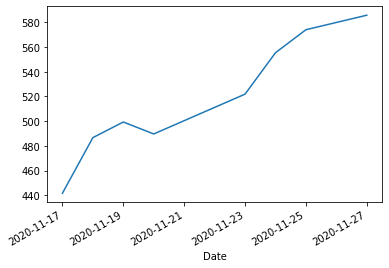

In [41]:
# Extract the daily close prices since Nov. 17
data = tsla.loc['2020-11-17':, ['Close']]
data['Close'].plot()

In [42]:
# It is roughly a line. Let's perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.arange(len(data)).reshape([-1, 1]), data['Close'])

LinearRegression()

In [43]:
m = model.coef_
print(m)

[19.60023971]


In [44]:
b = model.intercept_
print(b)

450.6641565958659


In [45]:
data['Prediction'] = np.arange(len(data)) * m + b
data.head()

,Close,Prediction
Date,,
2020-11-17,441.609985,450.664157
2020-11-18,486.640015,470.264396
2020-11-19,499.269989,489.864636
2020-11-20,489.609985,509.464876
2020-11-23,521.849976,529.065115


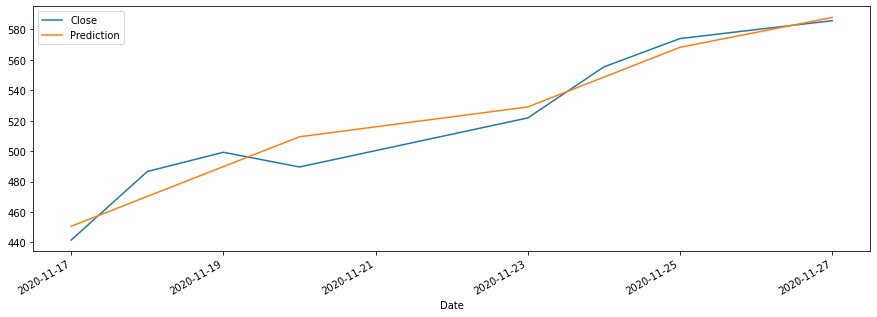

In [46]:
plt.figure(figsize=(15, 5))
data['Close'].plot()
data['Prediction'].plot()
plt.legend()